In [ ]:
# Importing dependencies
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense,Flatten,Reshape,LeakyReLU, Dropout, UpSampling2D
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback
import numpy as np


In [ ]:
ds = tfds.load("fashion_mnist",split ="train")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteEAHYXH/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteEAHYXH/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
data_iter = ds.as_numpy_iterator()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print(ds.as_numpy_iterator().next()['image'])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 18]
  [ 77]
  [227]
  [227]
  [208]
  [210]
  [225]
  [216]
  [ 85]
  [ 32]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 61]
  [100]
  [ 97]
  [ 80]
  [ 57]
  [117]
  [227]
  [238]
  [115]
  [ 49]
  [ 78]
  [106]
  [108]
  [ 71]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 81]
  [105]
  [ 80]
  [ 69]
  [ 72]
  [ 64]
  [ 44]
  [ 21]
  [ 13]
  [ 44]
  [ 69]
  [ 75]
  [ 75]
  [ 80]
  [114]
  [ 80]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 26]
  [ 92]
  [ 69]
  [ 68]
  [ 75]
  [ 75]
  [ 71]
  [ 74]
  [ 83]
  [ 75]
  [ 77]
  [ 78]
  [ 74]
  [ 74]
  [ 83]
  [ 77]
  [108]
  [ 34]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 55]
  [ 92]
  [ 69]
  [ 74]
  [ 74]
  [ 71]
  [ 71]


Text(0.5, 1.0, 'Fashion Wear data Visualization')

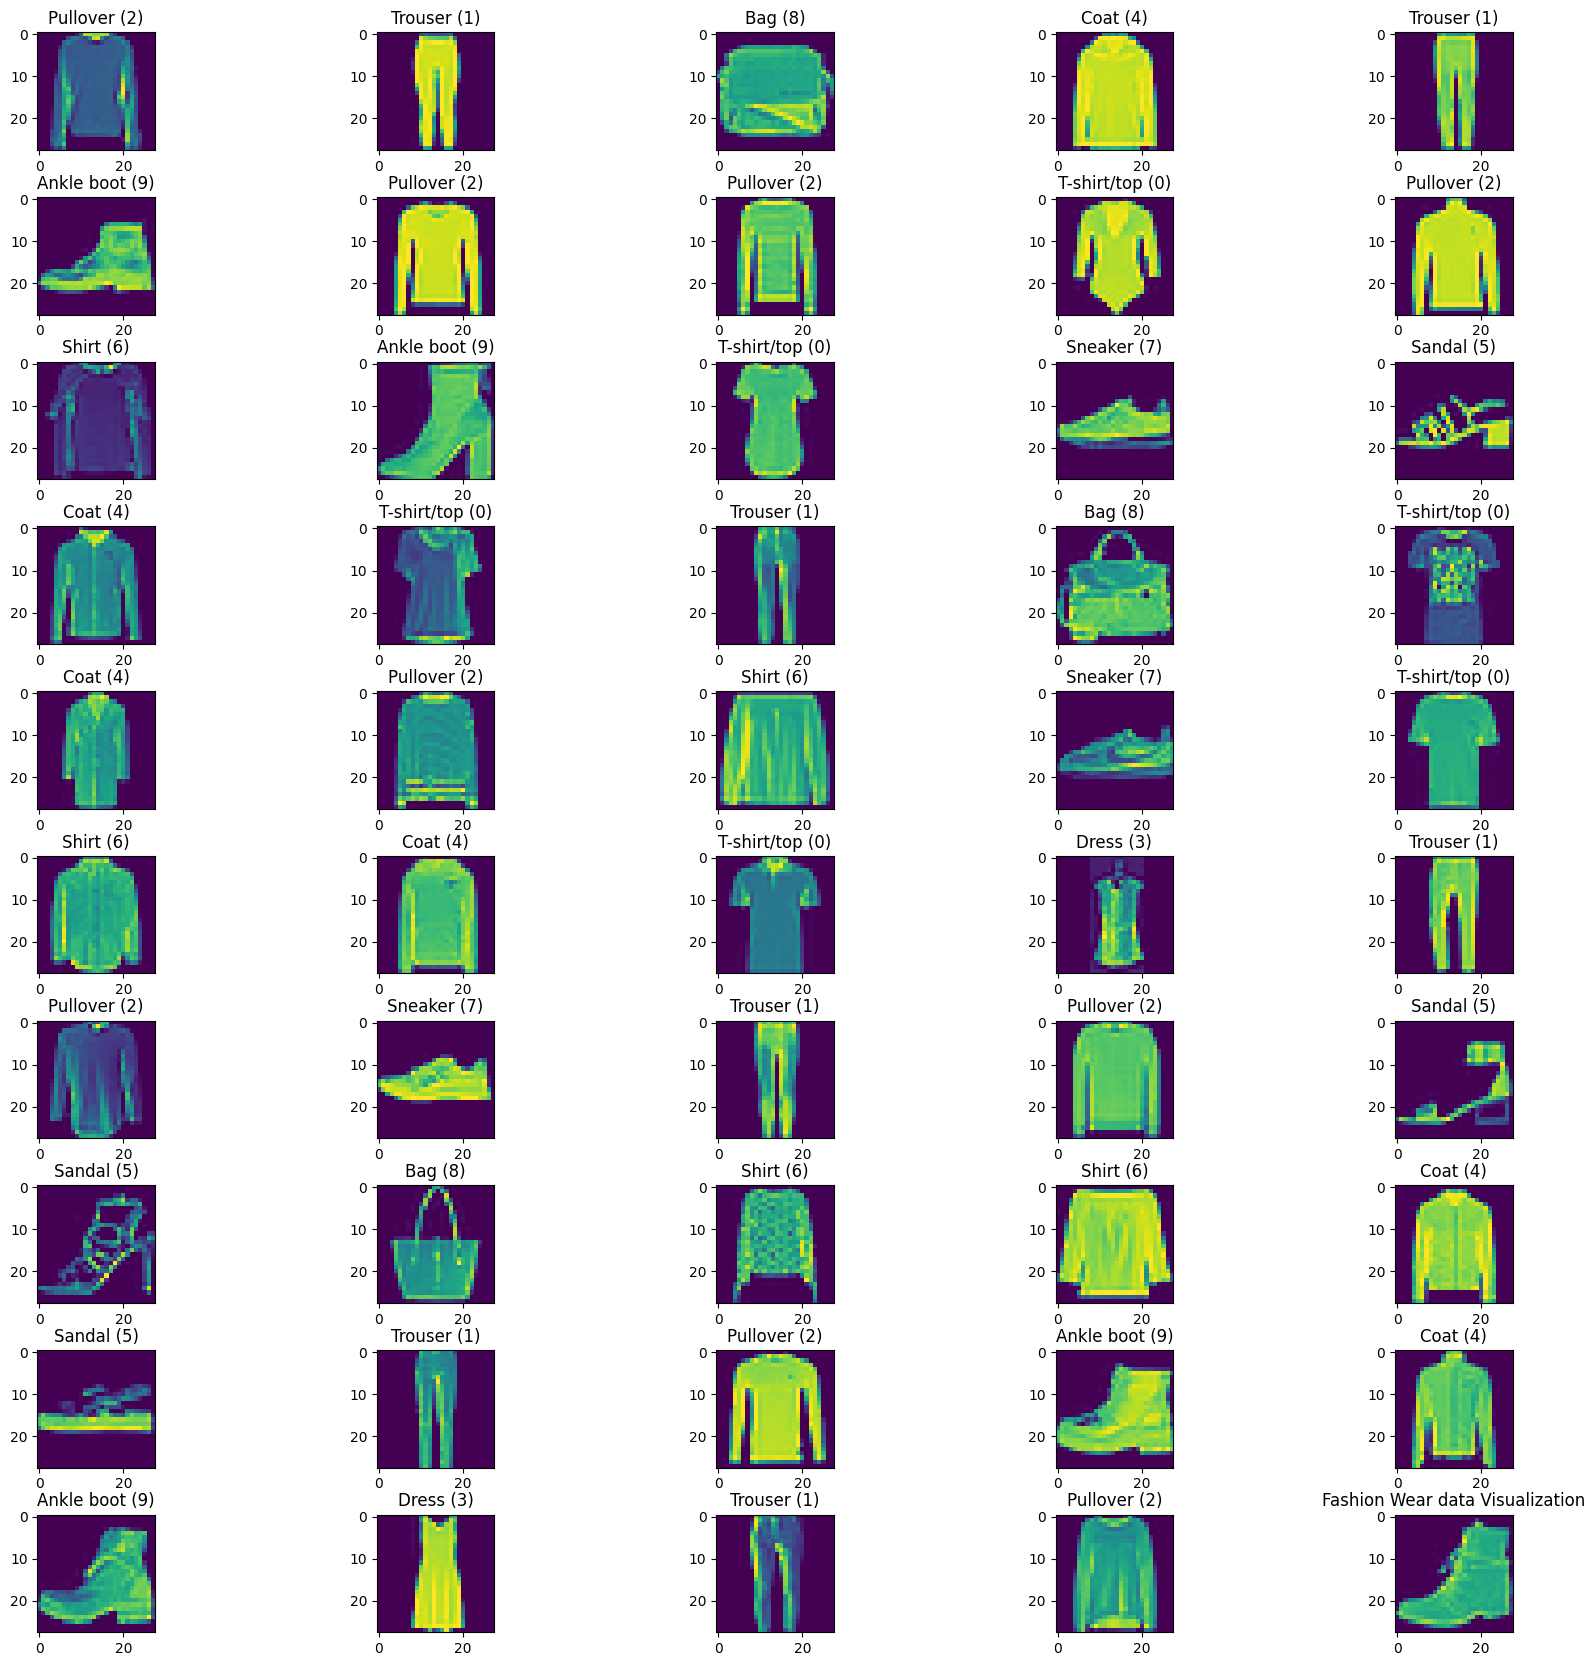

In [ ]:
# Visualizing the dataset

#Creating a subplot 
fig,ax = plt.subplots(ncols=5, nrows = 10, figsize=(20,20))

# Adjusting the plot spacings 
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

# Iterating over each image to plot 
for first_idx in range(10):
  for second_idx in range(5):
      next_iter = data_iter.next()
      ax[first_idx][second_idx].imshow(np.squeeze(next_iter['image']))
      ax[first_idx][second_idx].title.set_text(f"{class_names[next_iter['label']]} ({next_iter['label']})")
plt.title("Fashion Wear data Visualization")

In [ ]:
# Data Preprocessing 

In [ ]:
# Rescaling the images 
def rescale_images(img):
  return img['image']/255

In [ ]:
# Running the data set through scale_images for normalization
ds = ds.map(rescale_images)

# Cache the dataset for the batch
ds = ds.cache()

# Shuffling the dataset
ds.shuffle(60000)

# Batch the dataset into 128 images per batc
ds = ds.batch(128)

# Reducces the likelihood of bottlenecking
ds = ds.prefetch(64)

In [ ]:
# Building the Neural Network

In [ ]:

def build_generator():
  latent_dim = 128
  model = Sequential()
  model.add(Dense(7*7*128, input_dim = latent_dim))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  # Upsampling  1
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  # Upsampling  2
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolutional Block  1
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolutional Block  2
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  # conv layer
  model.add(Conv2D(1,4,padding = 'same' ,activation = 'sigmoid'))

  return model
  

In [ ]:
generator = build_generator()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

1/1 [==============================] - 6s 6s/step


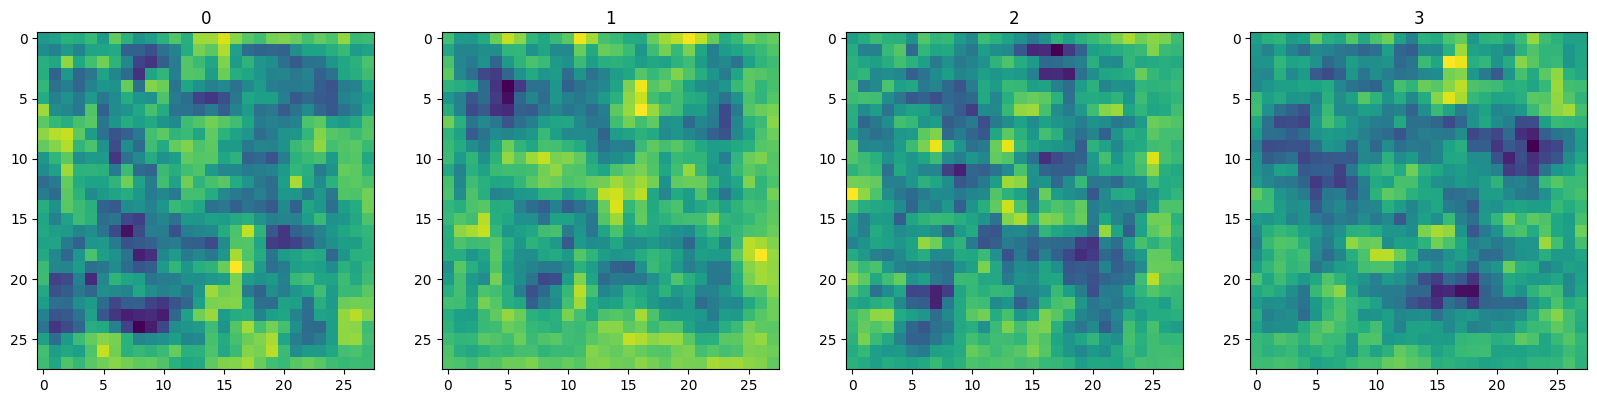

In [ ]:
images = generator.predict(np.random.randn(4,128,1))

fig,ax = plt.subplots(ncols=4,figsize = (20,20))

for idx,img in enumerate(images):
  ax[idx].imshow(img)
  ax[idx].title.set_text(idx)


In [ ]:
def build_discriminator():
  model = Sequential()

  # First Conv Block
  model.add(Conv2D(32,5,input_shape =(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Second Conv Block
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Third Conv Block
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Fourth Conv Block
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Flatten
  model.add(Flatten())

  # Output Dense layer 
  model.add(Dense(1,activation ='sigmoid'))

  return model


In [ ]:
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [ ]:
result = discriminator.predict(images)
print(result)

1/1 [==============================] - 0s 207ms/step
[[0.49992168]
 [0.4998091 ]
 [0.49991074]
 [0.49983674]]


In [ ]:
# Construct a training loop

In [ ]:
gen_opt = Adam(learning_rate=0.0001)
dis_opt = Adam(learning_rate=0.00001)

gen_loss = BinaryCrossentropy()
dis_loss = BinaryCrossentropy()

In [ ]:
class GAN(Model):

  def __init__(self,generator,discriminator,*args, **kwargs):

    # Pass through args and kwargs to the base class
    super().__init__(*args,**kwargs)
    
    # Create atributes for the generator and discriminator 
    self.generator = generator
    self.discriminator = discriminator


  def compile(self,gen_opt,dis_opt,gen_loss,dis_loss,*args, **kwargs):
     
    # Passing the args and kwargs through the base compile method 
    super().compile(*args,**kwargs)

    # Create atrributes for the generatoor and discrimainator 

    self.gen_opt = gen_opt
    self.dis_opt = dis_opt
    self.gen_loss = gen_loss
    self.dis_loss = dis_loss

    pass

  def train_step(self, batch):
    real_images = batch
    fake_images = self.generator(tf.random.normal((128,128,1)),training = False)

    # Train the Discriminator
    with tf.GradientTape() as d_tape:

      # Pass the real and fake images to the dicriminator model
      yhat_real = self.discriminator(real_images,training = True)
      yhat_fake = self.discriminator(fake_images,training= True)
      yhat_realfake = tf.concat([yhat_real,yhat_fake],axis=0)

      # Create labels for the ral and  fake images 
      y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)

      # Add some noise to the outputs 
      noise_real = 0.15 * tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15 * tf.random.uniform(tf.shape(yhat_fake))

      y_realfake += tf.concat([noise_real,noise_fake], axis =0)

      # Calculate the loss
      total_dis_loss = self.dis_loss(y_realfake,yhat_realfake)
      
      # Apply backpropagation 
    dgrad = d_tape.gradient(total_dis_loss,self.discriminator.trainable_variables)
    self.dis_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))

    # Train the Generator 

    with tf.GradientTape() as g_tape:

      # Generate some new images 
      gen_images = self.generator(tf.random.normal((128,128,1)),training = True)

      # Create the predicted labels
      predicted_labels = self.discriminator(gen_images,training = False)

      # Calculate loss - trick to training to fake out the discriminator
      total_gen_loss = self.gen_loss(tf.zeros_like(predicted_labels),predicted_labels)

    # Apply BackProp

    ggrad = g_tape.gradient(total_gen_loss,self.generator.trainable_variables)
    self.gen_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))

    return {"dis_loss": total_dis_loss,"gen_loss": total_gen_loss}





In [ ]:
#Creating instance of the subclassed model
gan_model = GAN(generator, discriminator)

In [ ]:
# Compiling the model
gan_model.compile(gen_opt,dis_opt,gen_loss,dis_loss)

In [ ]:
# Building Callback 

class ModelMonitor(Callback):

  def __init__(self,num_img=3,latent_dim=128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self,epoch,logs=None):
    random_latent_vectors = tf.random.uniform((self.num_img,self.latent_dim,1))
    generated_images = self.model.generator(random_latent_vectors)
    generated_images *= 2555
    generated_images.numpy()

    for i in range(self.num_img):
      img = array_to_img(generated_images[i])
      img.save(f"generated_img_{epoch}_{i}.png")



In [ ]:
# Training 
hist = gan_model.fit(ds,epochs = 2000,callbacks= [ModelMonitor()])

In [ ]:
# Review Model Performance 

In [ ]:
plt.suptitle("Loss")
plt.plot(hist.history['dis_loss'],label='dis_loss')
plt.plot(hist.history["gen_loss"],label = "gen_loss")
plt.legend()
plt.show()

In [ ]:
# Test Out the model

In [ ]:
imgs = generator.predict(tf.random.normal((16,128,1)))

In [ ]:
#Creating a subplot

fig,ax = plt.subplots(ncols=4, nrows = 4, figsize=(20,20))

# Adjusting the plot spacings 
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

# Iterating over each Generated Images to plot 
for first_idx in range(4):
  for second_idx in range(4):
      ax[first_idx][second_idx].imshow(imgs[(first_idx+1)*(second_idx+1)])
plt.title("Fashion Wear Generated")

In [ ]:
generator.save("generator.h5")
discriminator.save("discriminator.h5")